In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, ReLU, AveragePooling2D, concatenate, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# X is dataset of image cropped to 32x32 with 5 channels
import dask.array as da

X = da.from_array(np.load("/kaggle/input/astro-takneek/Image_Classification/dataset/X.npy", mmap_mode='r'))

# y is categorical data of target object
y = np.load("/kaggle/input/astro-takneek/Image_Classification/dataset/y_exp1.npy", allow_pickle=True)

In [3]:
print(X.shape)
print(y.shape)

(239999, 32, 32, 5)
(239999,)


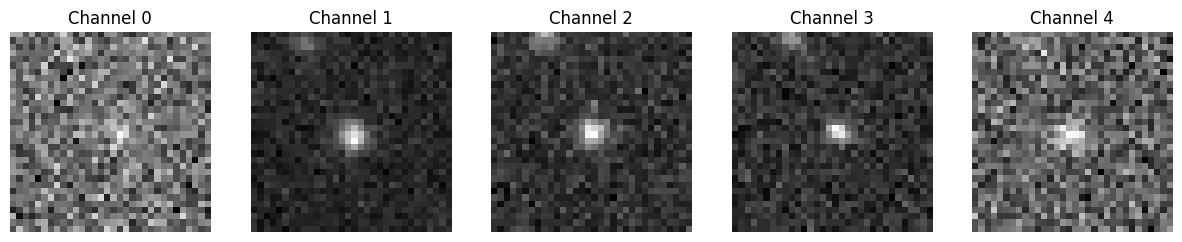

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Assume images is a numpy array with shape (num_images, 32, 32, 5)
# If you have a single image, images.shape will be (32, 32, 5)

def plot_fits_image(image, channels=None):
    """
    Plot the image across specified channels.

    Parameters:
    - image: numpy array of shape (32, 32, 5)
    - channels: list of channels to plot (default: all channels [0, 1, 2, 3, 4])
    """
    if channels is None:
        channels = list(range(image.shape[-1]))  # Default to all channels

    fig, axes = plt.subplots(1, len(channels), figsize=(15, 5))

    for i, channel in enumerate(channels):
        ax = axes[i]
        ax.imshow(image[:, :, channel], cmap='gray')
        ax.set_title(f'Channel {channel}')
        ax.axis('off')

    plt.show()

# Example: Visualize the first image in the dataset
plot_fits_image(X[1])


In [5]:
y, label_strings = pd.factorize(y, sort=True)
y = tf.keras.utils.to_categorical(y)

In [6]:
#Balanced Data
class_counts = np.sum(y, axis=0)
for i, count in enumerate(class_counts):
    print(f'Class {i}: {count} samples')

Class 0: 79999.0 samples
Class 1: 80000.0 samples
Class 2: 80000.0 samples


In [7]:
# Three classes of astronomical objects
print(label_strings)

['GALAXY' 'QSO' 'STAR']


In [8]:
# 50-50 splitting of data with further 0.15 split for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [9]:
inp_layer = tf.keras.Input(shape=X_train.shape[1:])

mod = Conv2D(filters=64, kernel_size=(5,5), padding='same')(inp_layer)
mod = ReLU()(mod)

c1 = Conv2D(filters=48, kernel_size=(1,1), padding='same')(mod)
c1 = ReLU()(c1)
c2 = Conv2D(filters=48, kernel_size=(1,1), padding='same')(mod)
c2 = ReLU()(c2)
c3 = Conv2D(filters=48, kernel_size=(1,1), padding='same')(mod)
c3 = ReLU()(c3)
c4 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(c1)
c4 = ReLU()(c4)
c5 = Conv2D(filters=64, kernel_size=(3,3), padding='same')(c1)
c5 = ReLU()(c5)
c6 = Conv2D(filters=64, kernel_size=(5,5), padding='same')(c2)
c6 = ReLU()(c6)
p1 = AveragePooling2D(pool_size=(1, 1))(c3)
mod = concatenate([c4,c5,c6,p1])

c7 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(mod)
c7 = ReLU()(c7)
c8 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(mod)
c8 = ReLU()(c8)
c9 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(mod)
c9 = ReLU()(c9)
c10 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(c7)
c10 = ReLU()(c10)
c11 = Conv2D(filters=92, kernel_size=(3,3), padding='same')(c7)
c11 = ReLU()(c11)
c12 = Conv2D(filters=92, kernel_size=(5,5), padding='same')(c8)
c12 = ReLU()(c12)
p2 = AveragePooling2D(pool_size=(1, 1))(c9)
mod = concatenate([c10,c11,c12,p2])
mod = AveragePooling2D(pool_size=(2, 2))(mod)

c13 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c13 = ReLU()(c13)
c14 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c14 = ReLU()(c14)
c15 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c15 = ReLU()(c15)
c16 = Conv2D(filters=128, kernel_size=(1,1), padding='same')(c13)
c16 = ReLU()(c16)
c17 = Conv2D(filters=128, kernel_size=(3,3), padding='same')(c13)
c17 = ReLU()(c17)
c18 = Conv2D(filters=128, kernel_size=(5,5), padding='same')(c14)
c18 = ReLU()(c18)
p3 = AveragePooling2D(pool_size=(1, 1))(c15)
mod = concatenate([c16,c17,c18,p3])

c19 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c19 = ReLU()(c19)
c20 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c20 = ReLU()(c20)
c21 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c21 = ReLU()(c21)
c22 = Conv2D(filters=128, kernel_size=(1,1), padding='same')(c19)
c22 = ReLU()(c22)
c23 = Conv2D(filters=128, kernel_size=(3,3), padding='same')(c19)
c23 = ReLU()(c23)
c24 = Conv2D(filters=128, kernel_size=(5,5), padding='same')(c20)
c24 = ReLU()(c24)
p4 = AveragePooling2D(pool_size=(1, 1))(c21)
mod = concatenate([c22,c23,c24,p4])
mod = AveragePooling2D(pool_size=(2, 2))(mod)

c25 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c25 = ReLU()(c25)
c26 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c26 = ReLU()(c26)
c27 = Conv2D(filters=128, kernel_size=(1,1), padding='same')(mod)
c27 = ReLU()(c27)
c28 = Conv2D(filters=128, kernel_size=(3,3), padding='same')(c25)
c28 = ReLU()(c28)
p5 = AveragePooling2D(pool_size=(1, 1))(c26)
mod = concatenate([c27,c28,p5])
mod = Flatten()(mod)    # Flatten the output to feed into Dense layers
mod = Dense(1024)(mod)
mod = Dense(1024)(mod)
out_layer = Dense(3, activation="softmax")(mod)

In [10]:
model = tf.keras.Model(inputs=inp_layer, outputs=out_layer)
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True)
datagen.fit(X_train)

/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:1495: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (101999, 32, 32, 5) (5 channels).
  warnings.warn(


In [12]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=30, restore_best_weights=True)

In [13]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=512),
                    epochs=300, validation_data=(X_val, y_val),
                    callbacks=[es],
                    verbose=1)

/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:619: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (101999, 32, 32, 5) (5 channels).
  warnings.warn(


Epoch 1/300


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725570618.856270     105 service.cc:145] XLA service 0x797d7c070b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725570618.856337     105 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725570618.856343     105 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1725570658.317182     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


200/200 ━━━━━━━━━━━━━━━━━━━━ 178s 635ms/step - accuracy: 0.6510 - loss: 0.7640 - val_accuracy: 0.8504 - val_loss: 0.3920
Epoch 2/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 111s 536ms/step - accuracy: 0.8656 - loss: 0.3503 - val_accuracy: 0.8802 - val_loss: 0.3168
Epoch 3/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 112s 541ms/step - accuracy: 0.8786 - loss: 0.3180 - val_accuracy: 0.8837 - val_loss: 0.3016
Epoch 4/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 111s 534ms/step - accuracy: 0.8842 - loss: 0.3022 - val_accuracy: 0.8928 - val_loss: 0.2831
Epoch 5/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 111s 537ms/step - accuracy: 0.8890 - loss: 0.2910 - val_accuracy: 0.8942 - val_loss: 0.2827
Epoch 6/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 110s 532ms/step - accuracy: 0.8928 - loss: 0.2788 - val_accuracy: 0.8984 - val_loss: 0.2571
Epoch 7/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 110s 530ms/step - accuracy: 0.8956 - loss: 0.2735 - val_accuracy: 0.8960 - val_loss: 0.2726
Epoch 8/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 112s 541ms/step - accuracy: 0.8942 - los

In [14]:
model.save("output/CNNClassifier.h5")

In [15]:
tf.keras.utils.plot_model(model, "output/CNNMod.pdf", show_shapes=True)

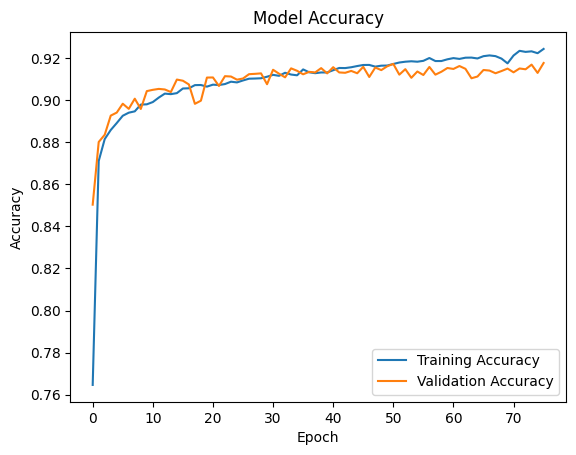

In [16]:
plt.figure()
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.savefig("output/CNNTraining.pdf")
plt.show()

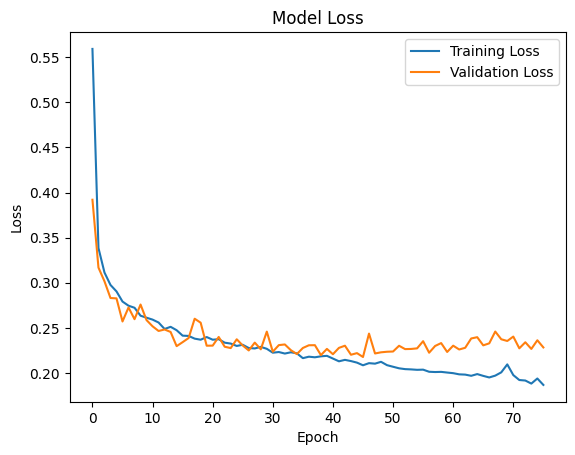

In [17]:
plt.figure()
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.savefig("output/CNNLoss.pdf")
plt.show()

In [18]:
preds_test = model.predict(X_test, batch_size=1024, verbose=0)

In [19]:
print(get_metrics(preds_test.argmax(axis=1), y_test.argmax(axis=1), label_strings))

NameError: name 'get_metrics' is not defined

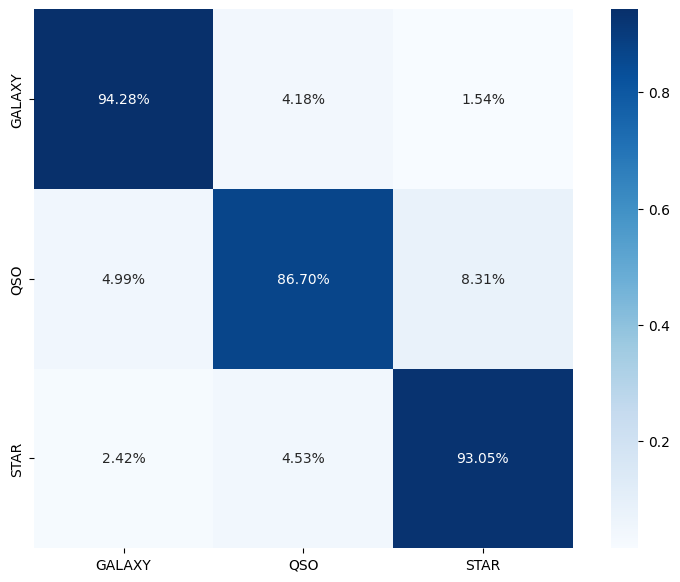

In [20]:
cm = metrics.confusion_matrix(preds_test.argmax(axis=1), y_test.argmax(axis=1), normalize='true')
df_cm = pd.DataFrame(cm, index=label_strings, columns=label_strings)
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, cmap="Blues", square=True, fmt='.2%')
plt.savefig("output/cnn_cm.pdf")